<div class="alert alert-block alert-danger">

#### Student Name: Anon Pipatpakin
#### Student ID: 33366829
# Unsupervised Learning
    

</div>

<div class="alert alert-block alert-info">
    
## Libaries

</div>

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.decomposition import PCA
from Activity5 import *
import pandas as pd
from sklearn.neural_network import MLPClassifier, MLPRegressor

## Question 3

**I.** Load Task2C labeled.csv, Task2C unlabeled.csv, and Task2C test.csv datasets, along with
the required libraries. Note that we will use both Task2C labeled.csv and Task2C unlabeled.csv
to train the autoencoder, and only Task2C labeled.csv to train the classifiers. Finally, we will
evaluate the trained classifier on the test dataset Task2C test.csv.



**loading data**

In [2]:
labeled_df = pd.read_csv("Task2C_labeled.csv") 
test_df = pd.read_csv("Task2C_test.csv")
unlabeled_df = pd.read_csv("Task2C_unlabeled.csv")

In [3]:
labeled_df.shape

(50, 785)

In [4]:
labeled_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.shape

(500, 785)

In [6]:
test_df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
unlabeled_df.shape

(1500, 784)

In [8]:
unlabeled_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data preprocessing**

In [9]:
X_labeled = np.array(labeled_df.iloc[:, 1:])
Y_labeled = np.array(labeled_df.iloc[:, 0])
X_unlabeled = np.array(unlabeled_df)

In [10]:
X_combined = np.concatenate((X_labeled, X_unlabeled))

--------------------------------

**II.** Train an autoencoder with only one hidden layer and change the number of its neurons to 20,
60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40).


In [11]:
neurons = np.arange(20, 221, 40)

In [17]:
# for labeled data
labeled_losses = []
labeled_model_list = []
unlabeled_losses = []
unlabed_model_list =[]
reps = 5

loss_matrix = np.zeros(shape=(reps, len(neurons)))


for j in range(len(neurons)):
    hidden = [neurons[j]]

#     regressor_mlp_lab = MLPRegressor(hidden_layer_sizes= hidden, activation=activation, solver= "sgd", max_iter= 1000)\
#                 .fit(X_labeled, X_labeled)

    regressor_mlp_lab = MLPRegressor(hidden_layer_sizes= hidden, activation="tanh", solver= "adam", max_iter= 200)\
                .fit(X_combined, X_combined)
#     lab_loss = np.sqrt(((regressor_mlp_lab.predict(X_labeled) - X_labeled) ** 2).sum(axis=1)).mean()
    lab_loss = np.sqrt(((regressor_mlp_lab.predict(X_combined) - X_combined) ** 2).sum(axis=1)).mean()
#         arm_loss = np.linalg.norm(X_combined - regressor_mlp_lab.predict(X_combined))/X_combined.shape[0]

#         print(lab_loss)
#         print(arm_loss)

#     loss_matrix[i, j] = lab_loss

#     regressor_mlp_unlab = MLPRegressor(hidden_layer_sizes= hidden, activation=activation, solver= "sgd", max_iter= 1000)\
#                 .fit(X_unlabeled, X_unlabeled)
#     unlab_loss = np.sqrt(((regressor_mlp_unlab.predict(X_unlabeled) - X_unlabeled) ** 2).sum(axis=1)).mean()

    labeled_losses.append(lab_loss)
#     unlabeled_losses.append(unlab_loss)

    labeled_model_list.append(regressor_mlp_lab)
#     unlabed_model_list.append(regressor_mlp_unlab)

C:\Users\non_n\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\non_n\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

In [ ]:
# mean_loss= loss_matrix.mean(axis= 0)

----------------------------

**III.** For each model in Step II, calculate and record the reconstruction error for the autoencoder,
which is simply the average of Euclidian distances between the input and output of the
autoencoder. Plot these values where the x-axis is the number of units in the middle layer
and the y-axis is the reconstruction error. Then, explain your findings based on the plot.


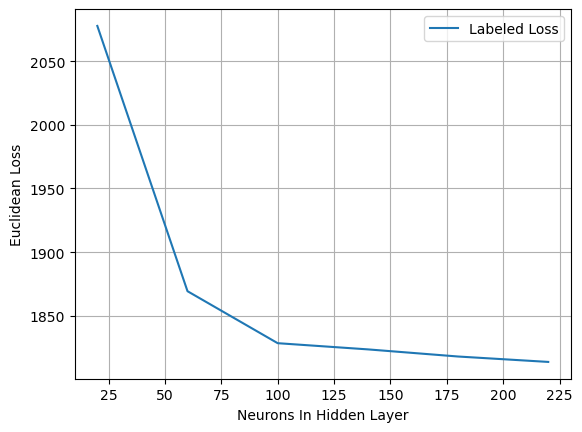

In [18]:
# high input low erros
plt.plot(list(neurons), labeled_losses, label= "Labeled Loss")
# plt.plot(list(neurons), unlabeled_losses, label= "Unlabeled Loss")
# plt.plot(range(10, (len(neurons)+1)*(10), 10), unlabeled_losses, label= "Unlabeled Loss")
# plt.yscale("log")
plt.ylabel("Euclidean Loss")
plt.xlabel("Neurons In Hidden Layer")
plt.legend()
plt.grid()

**Answer**

The line plot above indicate that by increasing  number of neurons in the hidden layer will improve the reconstracted input, because when adding more neurons the model will be able to capture more hidden pattern from the dataset.

----------------------------

**IV.** Build the 3-layer NN to build a classification model using all the original attributes from
the training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to
220 with a step size of 40). For each model, calculate and record the test error.


In [19]:
def count_error(model, data, labels):
    pred = model.predict(data)
    bool_array = pred == labels
    error = sum(1 for item in bool_array if item == False)
    return error

In [20]:
# preprocess data
X1 = labeled_df.iloc[:, 1:]
T1 = labeled_df.iloc[:, 0]
X2 = test_df.iloc[:, 1:]
T2 = test_df.iloc[:, 0]

In [22]:
# training classification
test_class_errors = []
train_class_errors = []

class_model_list = []
test_label = np.array(T2)
train_label = np.array(T1)

for neuron in neurons:
    hidden = [neuron]
    class_mlp = MLPClassifier(hidden_layer_sizes=hidden, activation="tanh", solver= "adam", max_iter= 5000)\
                .fit(X1, T1)

    test_error = count_error(model= class_mlp, data= X2, labels= test_label)
    test_class_errors.append(test_error)
    
    train_error = count_error(model= class_mlp, data= X1, labels= train_label)
    train_class_errors.append(train_error)
    
    class_model_list.append(class_mlp)

-------------------------------

**V.** Build augmented self-taught networks using the models learnt in Step II. For each model:
1) Add the output of the middle layer of an autoencoder as extra features to the original feature set\
2) Train a new 3-layer Neural Network using all features (original + extra) and varying the
number of hidden neurons (like Step IV) as well.\
3) Then calculate and record the test error.
For example, each model should be developed as follows: Model 1: 20 hidden neurons + extra
20 features (from an autoencoder), Model 2: 60 hidden neurons + extra 60 features (from an
autoencoder), ..., Model 5: 220 hidden neurons + extra 220 features (from an autoencoder).

In [23]:
def get_mid_output(X, weigth, intercept):
    input_data = X
    W_ = weigth
    b_ = intercept
    
    z1 = input_data @ W_ + b_
    a1 = np.tanh(z1)
    return (a1, z1)   

In [33]:
extra_features.shape

(500, 220)

In [25]:
# extrac extra features for training data
new_train_data_list = []

for i in range(len(labeled_model_list)):
    # get first layer weigth
    weigth = labeled_model_list[i].coefs_[0]
    # get first layer intercept 
    intercept = labeled_model_list[i].intercepts_[0]
    
    extra_features = get_mid_output(X= X1, weigth= weigth, intercept= intercept)[0]
    
    # combine with orginal data 
    new_data = np.concatenate((X_labeled, extra_features), axis =1)
    new_train_data_list.append(new_data)
    print(f"Number of extra features: {new_data.shape[1] - 784}")
    print(f"Training with {neurons[i]} hidden neurons")

Number of extra features: 20
Training with 20 hidden neurons
Number of extra features: 60
Training with 60 hidden neurons
Number of extra features: 100
Training with 100 hidden neurons
Number of extra features: 140
Training with 140 hidden neurons
Number of extra features: 180
Training with 180 hidden neurons
Number of extra features: 220
Training with 220 hidden neurons


In [26]:
# extrac extra features for testing data
new_test_data_list = []

for i in range(len(labeled_model_list)):
    # get first layer weigth
    weigth = labeled_model_list[i].coefs_[0]
    # get first layer intercept 
    intercept = labeled_model_list[i].intercepts_[0]
    
    extra_features = get_mid_output(X= X2, weigth= weigth, intercept= intercept)[0]
    
    # combine with orginal data 
    new_data = np.concatenate((X2, extra_features), axis =1)
    new_test_data_list.append(new_data)
    print(f"Number of extra features: {new_data.shape[1] - 784}")
    print(f"testing with {neurons[i]} hidden neurons")

Number of extra features: 20
testing with 20 hidden neurons
Number of extra features: 60
testing with 60 hidden neurons
Number of extra features: 100
testing with 100 hidden neurons
Number of extra features: 140
testing with 140 hidden neurons
Number of extra features: 180
testing with 180 hidden neurons
Number of extra features: 220
testing with 220 hidden neurons


In [27]:
# retrain model with extra features
new_test_errors = []
new_train_errors = []

for i in range(len(neurons)):
    hidden = [neurons[i]]
    train_data = new_train_data_list[i]
    test_data = new_test_data_list[i]
    
    class_mlp = MLPClassifier(hidden_layer_sizes=hidden, activation= "tanh", solver= "adam", max_iter= 5000)\
                .fit(train_data, T1)
    
    test_error = count_error(model= class_mlp, data= test_data, labels= T2)
    train_error = count_error(model= class_mlp, data= train_data, labels= T1)
    
    new_test_errors.append(test_error)
    new_train_errors.append(train_error)
    print(f"Training with {neurons[i]} hidden neurons")

Training with 20 hidden neurons
Training with 60 hidden neurons
Training with 100 hidden neurons
Training with 140 hidden neurons
Training with 180 hidden neurons
Training with 220 hidden neurons


**VI.** Plot the error rates for the 3-layer neural networks from Step IV and the augmented selftaught networks from Step V, while the x-axis is the number of hidden neurons and y-axis is
the classification error. Explain how the performance of the 3-layer neural networks and the
augmented self-taught networks is different and why they are different or why they are not
different, based on the plot.

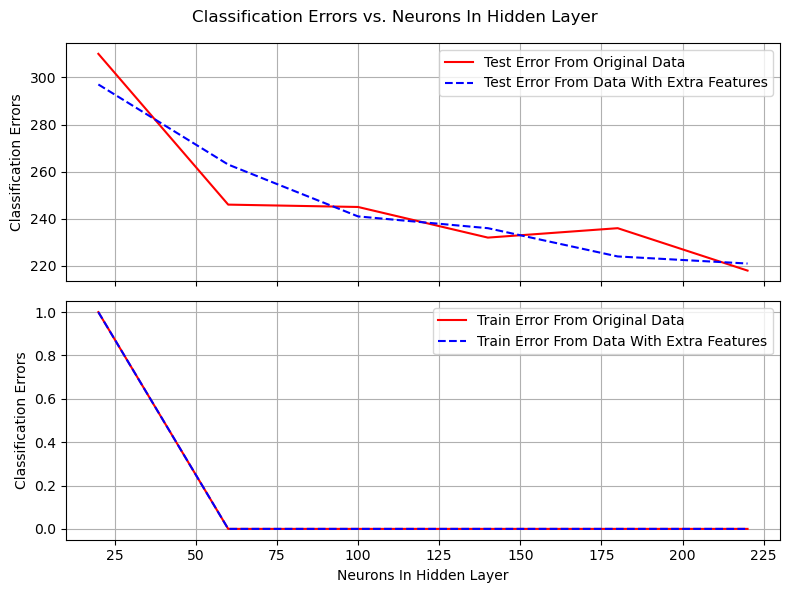

In [29]:
# create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# plot test errors
ax1.plot(neurons, test_class_errors, label="Test Error From Original Data", color= "red")
ax1.plot(neurons, new_test_errors, label="Test Error From Data With Extra Features", linestyle="--", color= "blue")
ax1.set_ylabel("Classification Errors")
ax1.legend()
ax1.grid()

# plot training errors
ax2.plot(neurons, train_class_errors, label="Train Error From Original Data", color= "red")
ax2.plot(neurons, new_train_errors, label="Train Error From Data With Extra Features", linestyle="--", color= "blue")
ax2.set_xlabel("Neurons In Hidden Layer")
ax2.set_ylabel("Classification Errors")
ax2.legend()
ax2.grid()

# add a title
plt.suptitle("Classification Errors vs. Neurons In Hidden Layer")

# show the plot
plt.tight_layout()
plt.show()

**Answer**

1. When the number of neurons in the hidden layer is low (less than 60), the model that includes extra features(from lower dimension of the previous model) outperforms the model using only the original data. This improvement occurs because the additional features introduce more patters and infromation, enhancing the models predictive performance.
2. At neurons 60 and 100, the model with original data shows a plateau in error rate. This means that by increasing number of neurons does not significantly improve the model performance. In contrast, the model with extra features continue to benefit from the additional information and performs better.